<a href="https://colab.research.google.com/github/stalan1997/DS-GA-1008-Deep-Learning/blob/main/Sys_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

# Problem 1

In [ ]:
def f1(x):
  x1, x2 = x
  output = np.exp(x1+3*x2-0.1) + np.exp(x1-3*x2-0.1) + np.exp(-x1-0.1)
  return output

In [ ]:
def f1_grad(x):
  x1, x2 = x
  x1_g = np.exp(x1+3*x2-0.1) + np.exp(x1-3*x2-0.1) - np.exp(-x1-0.1)
  x2_g = 3* np.exp(x1+3*x2-0.1) -3*np.exp(x1-3*x2-0.1) 
  return x1_g, x2_g

In [ ]:
def backlinesearch1(x,dir,alpha,beta):
  t = 1 #stepsize
  f_current = f1(x)
  temp = x
  x = x + t * dir
  f_new = f1(x)
  f_grad = f1_grad(temp)
  while f_new > f_current + t*alpha*np.matmul(f_grad, dir):
    t = t * beta
    x = temp + t * dir
    f_new = f1(x)


  return t, x #stepsize, final x

In [ ]:
num = 0
x = np.random.rand(2) #initial point
dir = np.array([-0.5,-1.5]) #chosen direction
alpha = 0.1
beta = 0.7
eps = 1e-6

g_norm = np.linalg.norm(f1_grad(x))
grad_x = -1*np.array(f1_grad(x))
x1_seq, x2_seq = [], []

In [ ]:
while g_norm > eps:
    
    # Iteration
    num += 1
    print('Iteration number: ', num)
    print('Norm of gradient: ', g_norm)
    
    
    # BT Line search and update
    t, x = backlinesearch1(x, grad_x, alpha, beta)
    
    
    # Calculate direction and norm (stopping condition)
    g_norm = np.linalg.norm(f1_grad(x))
    grad_x = -1*np.array(f1_grad(x))
    # For next iteration
    x1_seq.append(x[0])
    x2_seq.append(x[1])


Iteration number:  1
Norm of gradient:  78.01659671883566
Iteration number:  2
Norm of gradient:  11.31331153455999
Iteration number:  3
Norm of gradient:  6.004761862938918
Iteration number:  4
Norm of gradient:  3.5392966093101106
Iteration number:  5
Norm of gradient:  1.2431921024173016
Iteration number:  6
Norm of gradient:  0.9451733332174048
Iteration number:  7
Norm of gradient:  0.7689288572181211
Iteration number:  8
Norm of gradient:  0.24633281727514744
Iteration number:  9
Norm of gradient:  0.20385726815425634
Iteration number:  10
Norm of gradient:  0.1786041131589248
Iteration number:  11
Norm of gradient:  0.06437895862024182
Iteration number:  12
Norm of gradient:  0.056373163590345346
Iteration number:  13
Norm of gradient:  0.02152769687007383
Iteration number:  14
Norm of gradient:  0.018555140683799518
Iteration number:  15
Norm of gradient:  0.016755490049982443
Iteration number:  16
Norm of gradient:  0.006252325653516731
Iteration number:  17
Norm of gradient: 

Objective Value is : 2.559266696658251


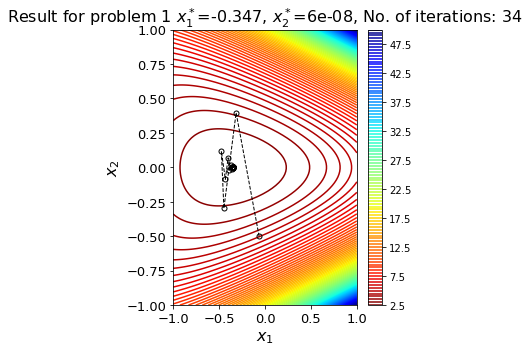

In [ ]:
# Visualize convergence of Problem 1
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f1([X, Y])

fig = plt.figure(figsize=(6,5))
ax = plt.axes()
ax1 = ax.contour(X, Y, Z, 100, cmap='jet_r')
ax.plot(x1_seq, x2_seq, color='k', 
        marker='o', markersize=5, fillstyle='none',
        linestyle='dashed', linewidth=1)
plt.title(r'Result for problem 1 $x_1^*$={0}, $x_2^*$={1}, No. of iterations: {2}'.format(np.round(x1_seq[-1],3),np.round(x2_seq[-1],8),num), fontsize=16)
plt.xlabel(r'$x_1$', fontsize=16); plt.xticks(fontsize=13)
plt.ylabel(r'$x_2$', fontsize=16); plt.yticks(fontsize=13)
plt.xlim([-1,1]); plt.ylim([-1,1])
plt.colorbar(ax1)
plt.tight_layout()


print('Objective Value is :',f1([x1_seq[-1],x2_seq[-1]]))


# Problem 2


In [ ]:
def f2(x, w):
  w1, w2, w3 = w
  x1, x2, x3 = x
  output = w1*np.log(x1)+w2*np.log(x2)+w3*np.log(x3)-np.power((1-x1-x2-x3),-2)
  return output

In [ ]:
def f2_grad(x, w):
  w1, w2, w3 = w
  x1, x2, x3 = x
  x1_g = w1/x1 - 2*(1-x1-x2-x3)
  x2_g = w2/x2 - 2*(1-x1-x2-x3)
  x3_g = w3/x3 - 2*(1-x1-x2-x3)
  return x1_g, x2_g, x3_g

  

In [ ]:
def backlinesearch2(x,w,dir,alpha,beta):
  t = 0.1 #stepsize
  f_current = -1*f2(x,w)
  temp = x
  x = x + t * dir
  f_new = -1*f2(x,w)
  f_grad = -1*np.array(f2_grad(temp,w))

  while f_new > f_current + t*alpha*np.matmul(f_grad, dir):
    if x.sum()>1 or x.any()<0:
      break
    t = t * beta
    x = temp + t * dir
    f_new = -1*f2(x,w)

  return t, x #stepsize, final x

In [ ]:
#initial condition
num1 = 0
num2 = 0
x = np.array([0.1,0.1,0.1]) #initial point
alpha = 0.1
beta = 0.5
eps = 1e-6



In [ ]:
#Problem 2, subproblem 1
#w1 = 1, w2 = 1, w3 = 1
w1 = np.array([1,1,1])
dir = np.array([1,1,1])
temp = x
t_final_1, x_final_1 = backlinesearch2(x,w1,dir,alpha,beta)

In [ ]:
print('The final solution of x is:', x_final_1)
print('The optimum maximum value is:', f2(x_final_1,w1))

The final solution of x is: [0.125 0.125 0.125]
The optimum maximum value is: -8.798324625039507


In [ ]:
#Problem 2, subproblem 2
#w1 = 1, w2 = 2, w3 = 3
w2 = np.array([1,2,3])
x2 = np.array([0.1,0.1,0.1])
gnorm_2 = np.linalg.norm(np.array(f2_grad(x2,w2)))
grad_2 = np.array(f2_grad(x2,w2))/gnorm_2
eps = 1e-5
t2 = 1

In [ ]:
while t2 > eps:
    
    # Iteration
    num2 += 1
    print('Iteration number: ', num2)
    print('Norm of gradient: ', gnorm_2)
    
    # BT Line search
    t2, x2 = backlinesearch2(x2, w2, grad_2, alpha, beta)
    
    
    # Calculate direction and norm (stopping condition)
    gnorm_2 = np.linalg.norm(np.array(f2_grad(x2,w2)))
    grad_2 = np.array(f2_grad(x2,w2))/gnorm_2


Iteration number:  1
Norm of gradient:  35.18351886892498
Iteration number:  2
Norm of gradient:  20.773487312056496


In [ ]:
print('The approximate solution of x is:', x2)
print('The resulted optimal value is,',f2(x2, w2))

The approximate solution of x is: [0.12444326 0.15286566 0.18128806]
The resulted optimal value is, -14.374905341205707


# Problem 6

In [ ]:
#initialization
alpha = 0.01
beta = 0.5
iter = 200
grad_bound = 1e-3
A = np.random.randn(200,100)

In [ ]:
x = np.zeros(100)

In [ ]:
def f6(x, A):
  output = -np.log(1-A@x).sum()- np.log(1+x).sum()- np.log(1-x).sum()
  return output

In [ ]:
def f6_grad(x, A):
  output = np.transpose(A)@(1/(1-A@x)) -1/(1+x)-1/(1-x)
  return output

In [ ]:
t_record = []
obj_record = []

for i in range(iter):
  val = f6(x,A)
  grad = f6_grad(x,A)
  if np.linalg.norm(grad) < grad_bound:
    break
  fprime = -1*np.transpose(grad)@grad
  t = 1
  
  
  while np.max(A@(x-t*grad)) >= 1 or np.max(abs(x-t*grad)) >= 1:
    t = beta*t
  while f6(x-t*grad, A) > val + alpha*t*fprime:
    t = beta*t
  x = x - t*grad
  print(t)
  t_record.append(t)
  obj_record.append(val)

0.001953125
0.00390625
0.0078125
0.001953125
0.001953125
0.00048828125
0.00390625
6.103515625e-05
0.0009765625
0.00390625
0.00048828125
0.00390625
0.0009765625
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.0009765625
0.001953125
0.00390625
0.001953125
0.0009765625
0.001953125
0.001953125
0.001953125
0.0009765625
0.001953125
0.001953125
0.0009765625
0.001953125
0.00390625
0.001953125
0.0009765625
0.001953125
0.001953125
0.001953125
0.0009765625
0.001953125
0.0009765625
0.001953125
0.0009765625
0.001953125
0.0009765625
0.0009765625
0.000244140625
9.5367431640625e-07
1.8189894035458565e-12
2.842170943040401e-14
8.881784197001252e-16
2.842170943040401e-14
1.1368683772161603e-13
1.1368683772161603e-13
2.2737367544323206e-13
2.842170943040401e-14
1.1368683772161603e-13
4.547473508864641e-13
4.547473508864641e-13
6.93889390

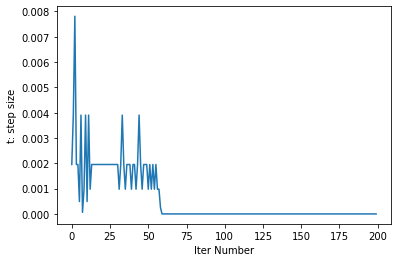

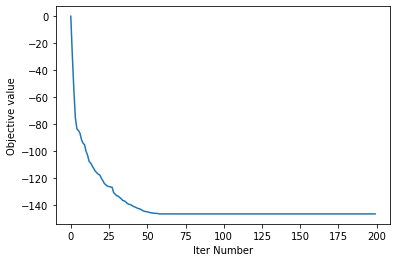

In [ ]:
#Result of (a), gradient method

num = np.arange(200)
plt.plot(num, t_record,)
plt.xlabel('Iter Number')
plt.ylabel('t: step size')
plt.show()

plt.plot(num, obj_record)
plt.xlabel('Iter Number')
plt.ylabel('Objective value')
plt.show()

In [ ]:
#Part(b), Newton's method
newton_bound = 1e-8
x = np.zeros(100)


In [ ]:
t_record_new = []
obj_record_new = []

for i in range(iter):
  val = f6(x,A)
  d = 1/(1-A@x)
  grad = f6_grad(x,A)
  hessian = np.transpose(A)@np.diag(d**2)@A +np.diag(1/(1+x)**2 + 1/(1-x)**2)
  v = -np.linalg.inv(hessian)@grad
  fprime = np.transpose(grad)@grad
  if abs(fprime) < newton_bound:
    break
  t = 1  
  while np.max(A@(x-t*grad)) >= 1 or np.max(abs(x-t*grad)) >= 1:
    t = beta*t
  while f6(x-t*grad, A) > val + alpha*t*fprime:
    t = beta*t
  x = x - t*grad
  print(t)
  t_record_new.append(t)
  obj_record_new.append(val)

0.001953125
0.00390625
0.0078125
0.001953125
0.001953125
0.00048828125
0.00390625
6.103515625e-05
0.0009765625
0.00390625
0.00048828125
0.00390625
0.0009765625
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.0009765625
0.001953125
0.0078125
0.001953125
0.0009765625
0.001953125
0.0009765625
0.001953125
0.001953125
0.001953125
0.0009765625
0.001953125
0.001953125
0.0009765625
0.001953125
0.0009765625
0.001953125
0.0009765625
0.001953125
0.0009765625
0.0009765625
0.001953125
0.00390625
0.001953125
0.0009765625
0.0001220703125
1.7763568394002505e-15
8.881784197001252e-16
6.938893903907228e-18
1.3877787807814457e-17
3.469446951953614e-18
3.469446951953614e-18
3.469446951953614e-18
3.469446951953614e-18
3.469446951953614e-18
3.469446951953614e-18
3.469446951953614e-18
3.469446951953614e-18
3.469446951953614e-18
3

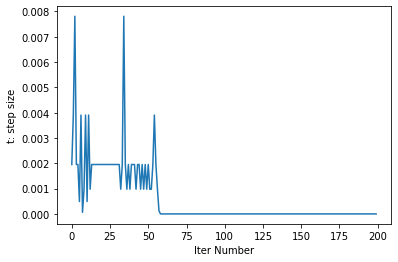

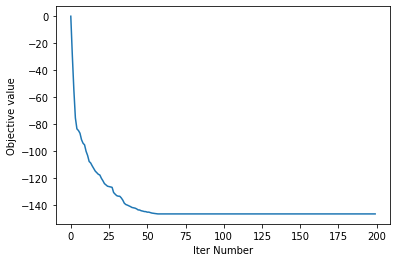

In [ ]:
#Result of (b), gradient method

num = np.arange(200)
plt.plot(num, t_record_new,)
plt.xlabel('Iter Number')
plt.ylabel('t: step size')
plt.show()

plt.plot(num, obj_record_new)
plt.xlabel('Iter Number')
plt.ylabel('Objective value')
plt.show()

# Problem 7

In [62]:
#initialization
alpha = 0.01
beta = 0.5
newton_bound = 1e-8


In [63]:
#alpha, beta, newton_bound same as before
iter = 100
x = np.random.rand(100) # n = 100
A = np.random.randn(30,100) #p = 30, n = 100

In [64]:
def f7(x):
  output = np.transpose(x)@np.log(x)
  return output

In [65]:
def f7_grad(x):
  output = 1 + np.log(x)
  return output

In [66]:
obj_a = []
x0 = x
for i in range(iter):
  val = f7(x)
  grad = f7_grad(x)
  hessian = np.diag(1/x)
  a = np.concatenate((hessian, np.transpose(A)), axis = 1)
  b = np.concatenate((A,np.zeros((30,30))), axis = 1)
  c = np.concatenate((a,b), axis = 0)
  d = np.concatenate((grad, np.zeros((30,1))),axis = None)
  x_eqs = - np.linalg.inv(c)@d
  v = x_eqs[0:100]
  fprime = np.transpose(grad)@v
  if abs(fprime) < newton_bound:
    break
  t = 1
  while np.min(x+t*v) <= 0:
    t = beta*t
  while f7(x+t*v) >= val + t*alpha*fprime:
    t = beta*t
  x = x + t* v
  obj_a.append(f7(x))


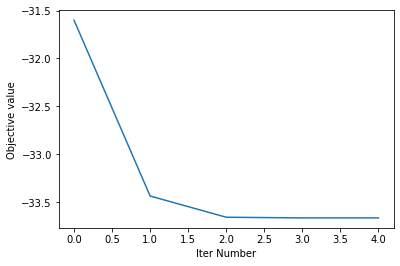

In [67]:
#result of (a)
num = np.arange(len(obj_a))

plt.plot(num, obj_a)
plt.xlabel('Iter Number')
plt.ylabel('Objective value')
plt.show()

In [68]:
x = x0
obj_x0 = []
nu = np.zeros(30)
for i in range(iter):
  a = 1+np.log(x)+np.transpose(A)@nu
  b = A@x-A@x0
  r = np.concatenate((a,b), axis = None)
  c = np.concatenate((np.diag(1/x), np.transpose(A)), axis = 1)
  d = np.concatenate((A,np.zeros((30,30))), axis = 1)
  e = np.concatenate((c,d), axis = 0)
  x_eqs = - np.linalg.solve(e, r)
  dx = x_eqs[0:100]
  dnu = x_eqs[100:130]
  if np.linalg.norm(r) < newton_bound:
    break
  t = 1
  while np.min(x+t*dx) <= 0:
    t = beta*t
  a1 = 1+np.log(x+t*dx)+np.transpose(A)@(nu+dnu)
  b1 = A@(x+dx)-A@x0
  c1 = np.concatenate((a1,b1), axis = None)
  while np.linalg.norm(c1) > (1-alpha*t)*np.linalg.norm(r):
    t = beta*t

  x = x + t*dx
  nu = nu + t*dnu
  obj_x0.append(f7(x))

In [69]:
x = np.ones(100)
obj_1 = []
nu = np.zeros(30)
for i in range(iter):
  a = 1+np.log(x)+np.transpose(A)@nu
  b = A@x-A@x0
  r = np.concatenate((a,b), axis = None)
  c = np.concatenate((np.diag(1/x), np.transpose(A)), axis = 1)
  d = np.concatenate((A,np.zeros((30,30))), axis = 1)
  e = np.concatenate((c,d), axis = 0)
  x_eqs = - np.linalg.inv(e)@r
  dx = x_eqs[0:100]
  dnu = x_eqs[100:130]
  if np.linalg.norm(r) < newton_bound:
    break
  t = 1
  while np.min(x+t*dx) <= 0:
    t = beta*t
  a1 = 1+np.log(x+t*dx)+np.transpose(A)@(nu+dnu)
  b1 = A@(x+dx)-A@x0
  c1 = np.concatenate((a1,b1), axis = None)
  while np.linalg.norm(c1) > (1-alpha*t)*np.linalg.norm(r):
    t = beta*t

  x = x + t*dx
  nu = nu + t*dnu
  obj_1.append(f7(x))

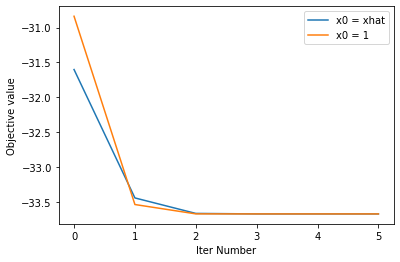

In [70]:
#result of (b)
num = np.arange(len(obj_x0))

plt.plot(num, obj_x0, label = 'x0 = xhat')
num = np.arange(len(obj_1))
plt.plot(num, obj_1, label = 'x0 = 1')
plt.xlabel('Iter Number')
plt.ylabel('Objective value')
plt.legend()
plt.show()

By above figure, we can see that x0 = 1 converges faster to the optimum value, but no matter what initial value x0 is, it always has the same optimal value.

In [88]:
#part(c)
nu = np.zeros(30)
b = A@x0
def fdual(x):
  output = -np.transpose(b)@x - np.exp(-np.transpose(A)@x-1).sum()
  return output

In [89]:
#part (c)
obj_dual = []
for i in range(iter):
  val = -fdual(nu)
  grad = b - A@np.exp(-np.transpose(A)@nu-1)
  hessian = A@np.diag(np.exp(-np.transpose(A)@nu-1))@np.transpose(A)
  v = -np.linalg.solve(hessian, grad)
  fprime = np.transpose(grad)@v
  if abs(fprime) < newton_bound:
    break
  t = 1
  while -fdual(nu+t*v) > val+t*alpha*fprime:
    t = beta*t
  nu = nu + t*v
  obj_dual.append(fdual(nu))

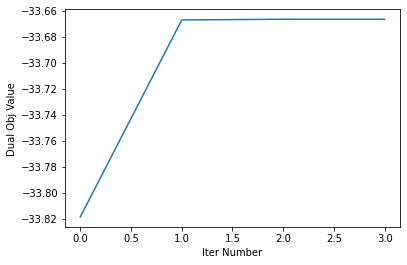

In [91]:
#result of (c)
num = np.arange(len(obj_dual))

plt.plot(num, obj_dual)
plt.xlabel('Iter Number')
plt.ylabel('Dual Obj Value')
plt.show()

# Problem 9

In [92]:
import random
import scipy

def norm2(x):
    return np.sqrt(np.sum([i**2 for i in x]))

def norm1(x):
    return np.sum([abs(i) for i in x])

def Normalized_Error(x,x_pre):
    return norm2(x-x_pre)/norm2(x)
        
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [93]:
def define_A(M,N): #measurement matrix

    A = []
    for i in range(N):
      col = np.random.randn(M)
      col /= norm2(col)
        
      A.append(col)
    A = np.array(A).T
    return A

def define_x(s,N):
    #real signal
    
    # Uniformly sample the index

    index = random.sample(range(N),s)
    x = np.zeros(N)
    for idx in index:
      # For each index, draw a number from [-10,-1]||[1,10]
      r = np.random.rand()
      if r >0.5:
        x[idx]=(r-0.5)*18+1
      else:
        x[idx]=(r-0.5)*18-1
    return x.T,index

def OMP(A,y,N,stop=np.infty,threshold=0.01):
    #Orthogonal Matching pursuit algorithm

    r = y
    x_pre = np.zeros(N)
    Lambdas = []
    i = 0
    # Control stop interation with norm thresh or sparsity
    while norm2(r)>threshold and i<stop:
       
      # Compute the score of each atoms
      scores = A.T.dot(r)
        
      # Select the atom with the max score
      Lambda = np.argmax(abs(scores))
      # print(Lambda)
      Lambdas.append(Lambda)
        
      # All selected atoms form a basis
      basis = A[:,Lambdas]

      # Least square solution for y=Ax
      x_pre[Lambdas] = np.linalg.inv(np.dot(basis.T,basis)).dot(basis.T).dot(y)
        
      # Compute the residual
      r = y - A.dot(x_pre)
        
      i += 1
    return x_pre.T,Lambdas



Author: Yilang Hao
NetID: yh3062